# ***Electric Vehicle EDA***

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import io

In [53]:
df = pd.read_csv('/content/EV_dataset.csv')

In [54]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [56]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [58]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [59]:
df.duplicated().sum()

0

In [60]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [61]:
# Replacing missing values in 'Legislative District' with the most frequent value
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mode()[0])

# Filling null values in 'Electric Utility' with its mode
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

# Assigning 'Unknown' to missing values in 'Vehicle Location'
df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')

# Imputing missing 'Model' values based on 'Make' using the most common value
df['Model'] = df.groupby('Make')['Model'].transform(lambda x: x.fillna(x.mode()[0]))


In [62]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [63]:
# Cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112634 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

# ***Task 1 - Applying Exploratory Data Analysis (Univariate and Bivariate)***

## ***Univariate ***

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



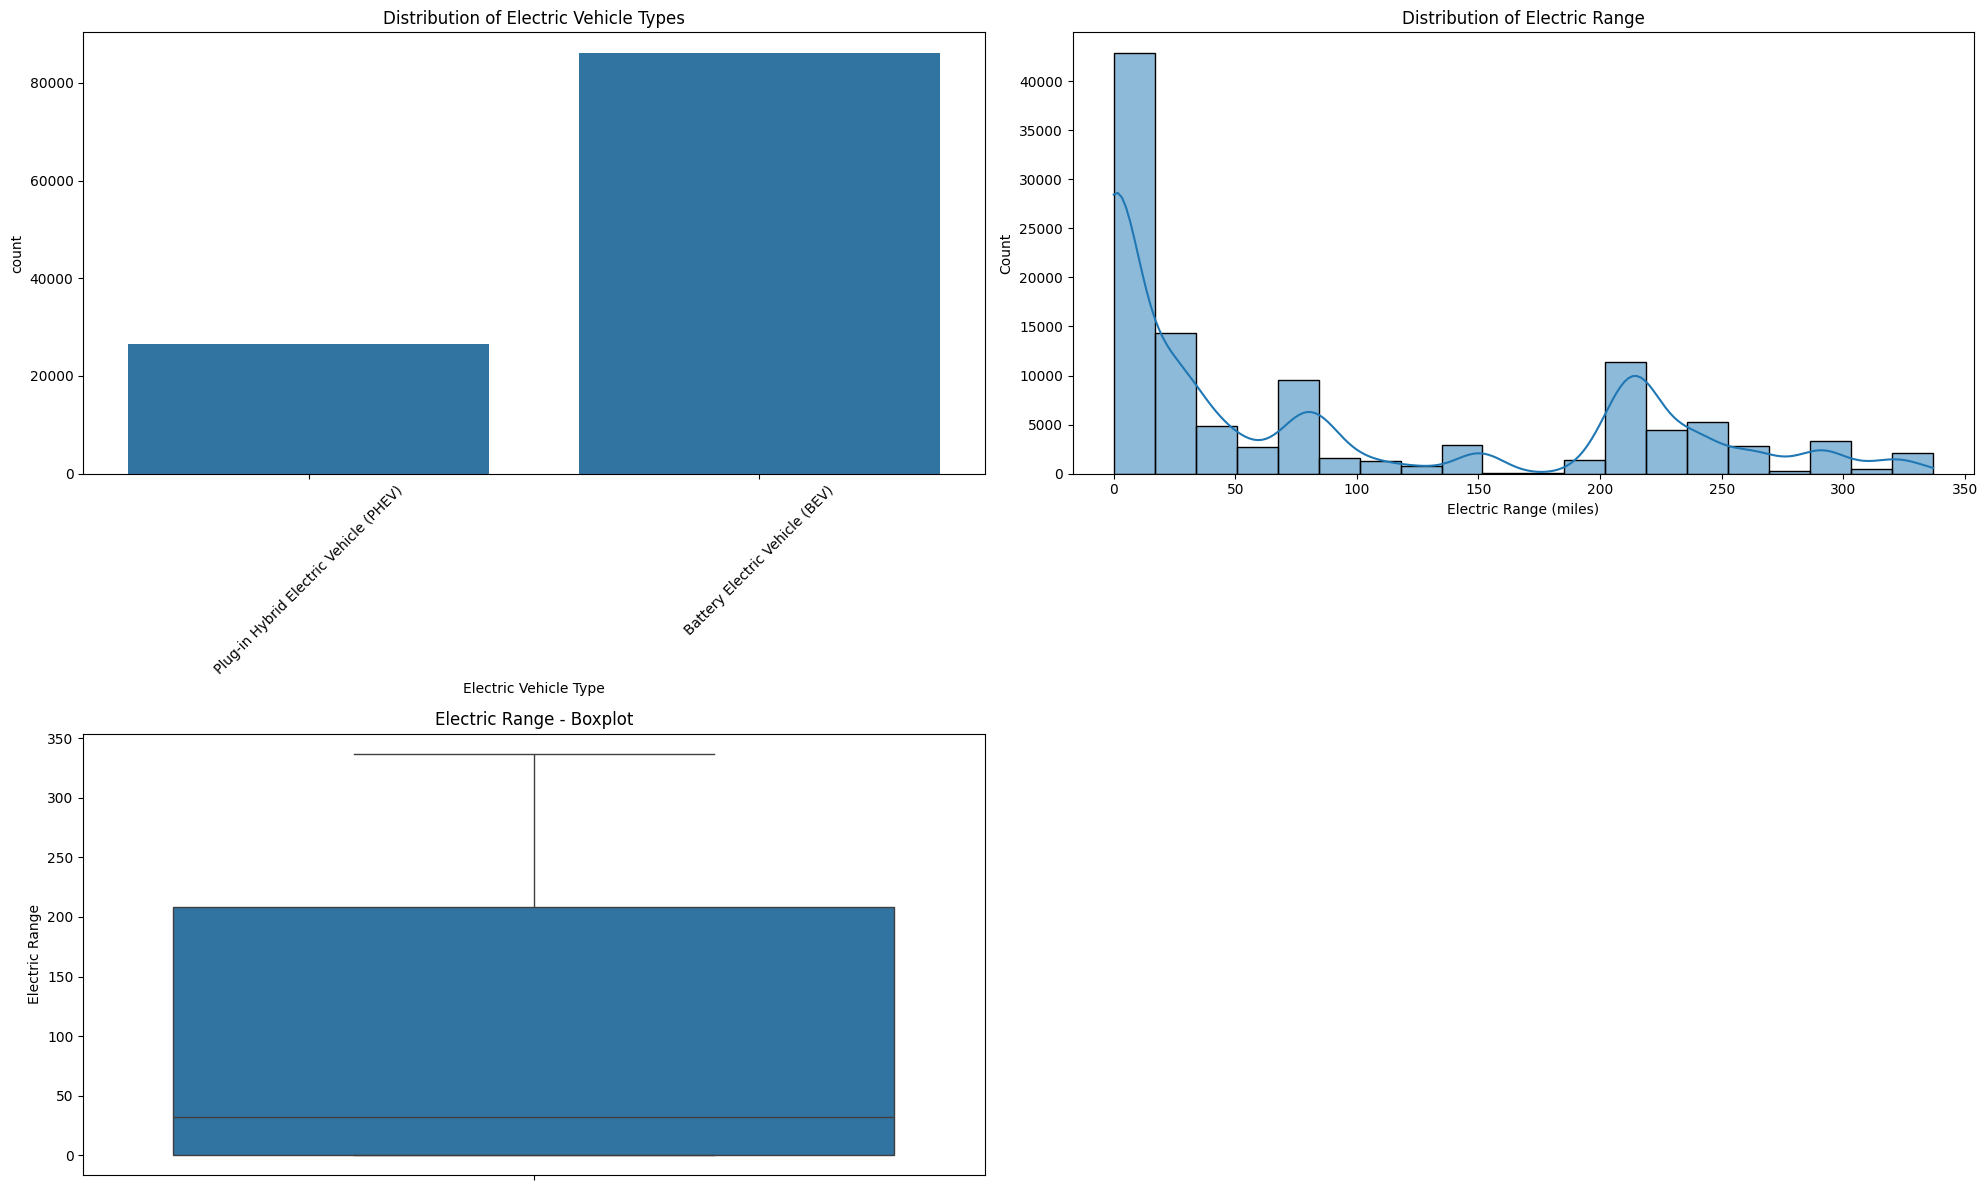

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot count of Electric Vehicle types
sns.countplot(x='Electric Vehicle Type', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Electric Vehicle Types')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot histogram for 'Electric Range'
sns.histplot(df['Electric Range'], kde=True, bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Electric Range')
axes[0, 1].set_xlabel('Electric Range (miles)')

# Plot boxplot for 'Electric Range'
sns.boxplot(y='Electric Range', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Electric Range - Boxplot')

# Hide the fourth quadrant
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


## ***Bivariate***

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



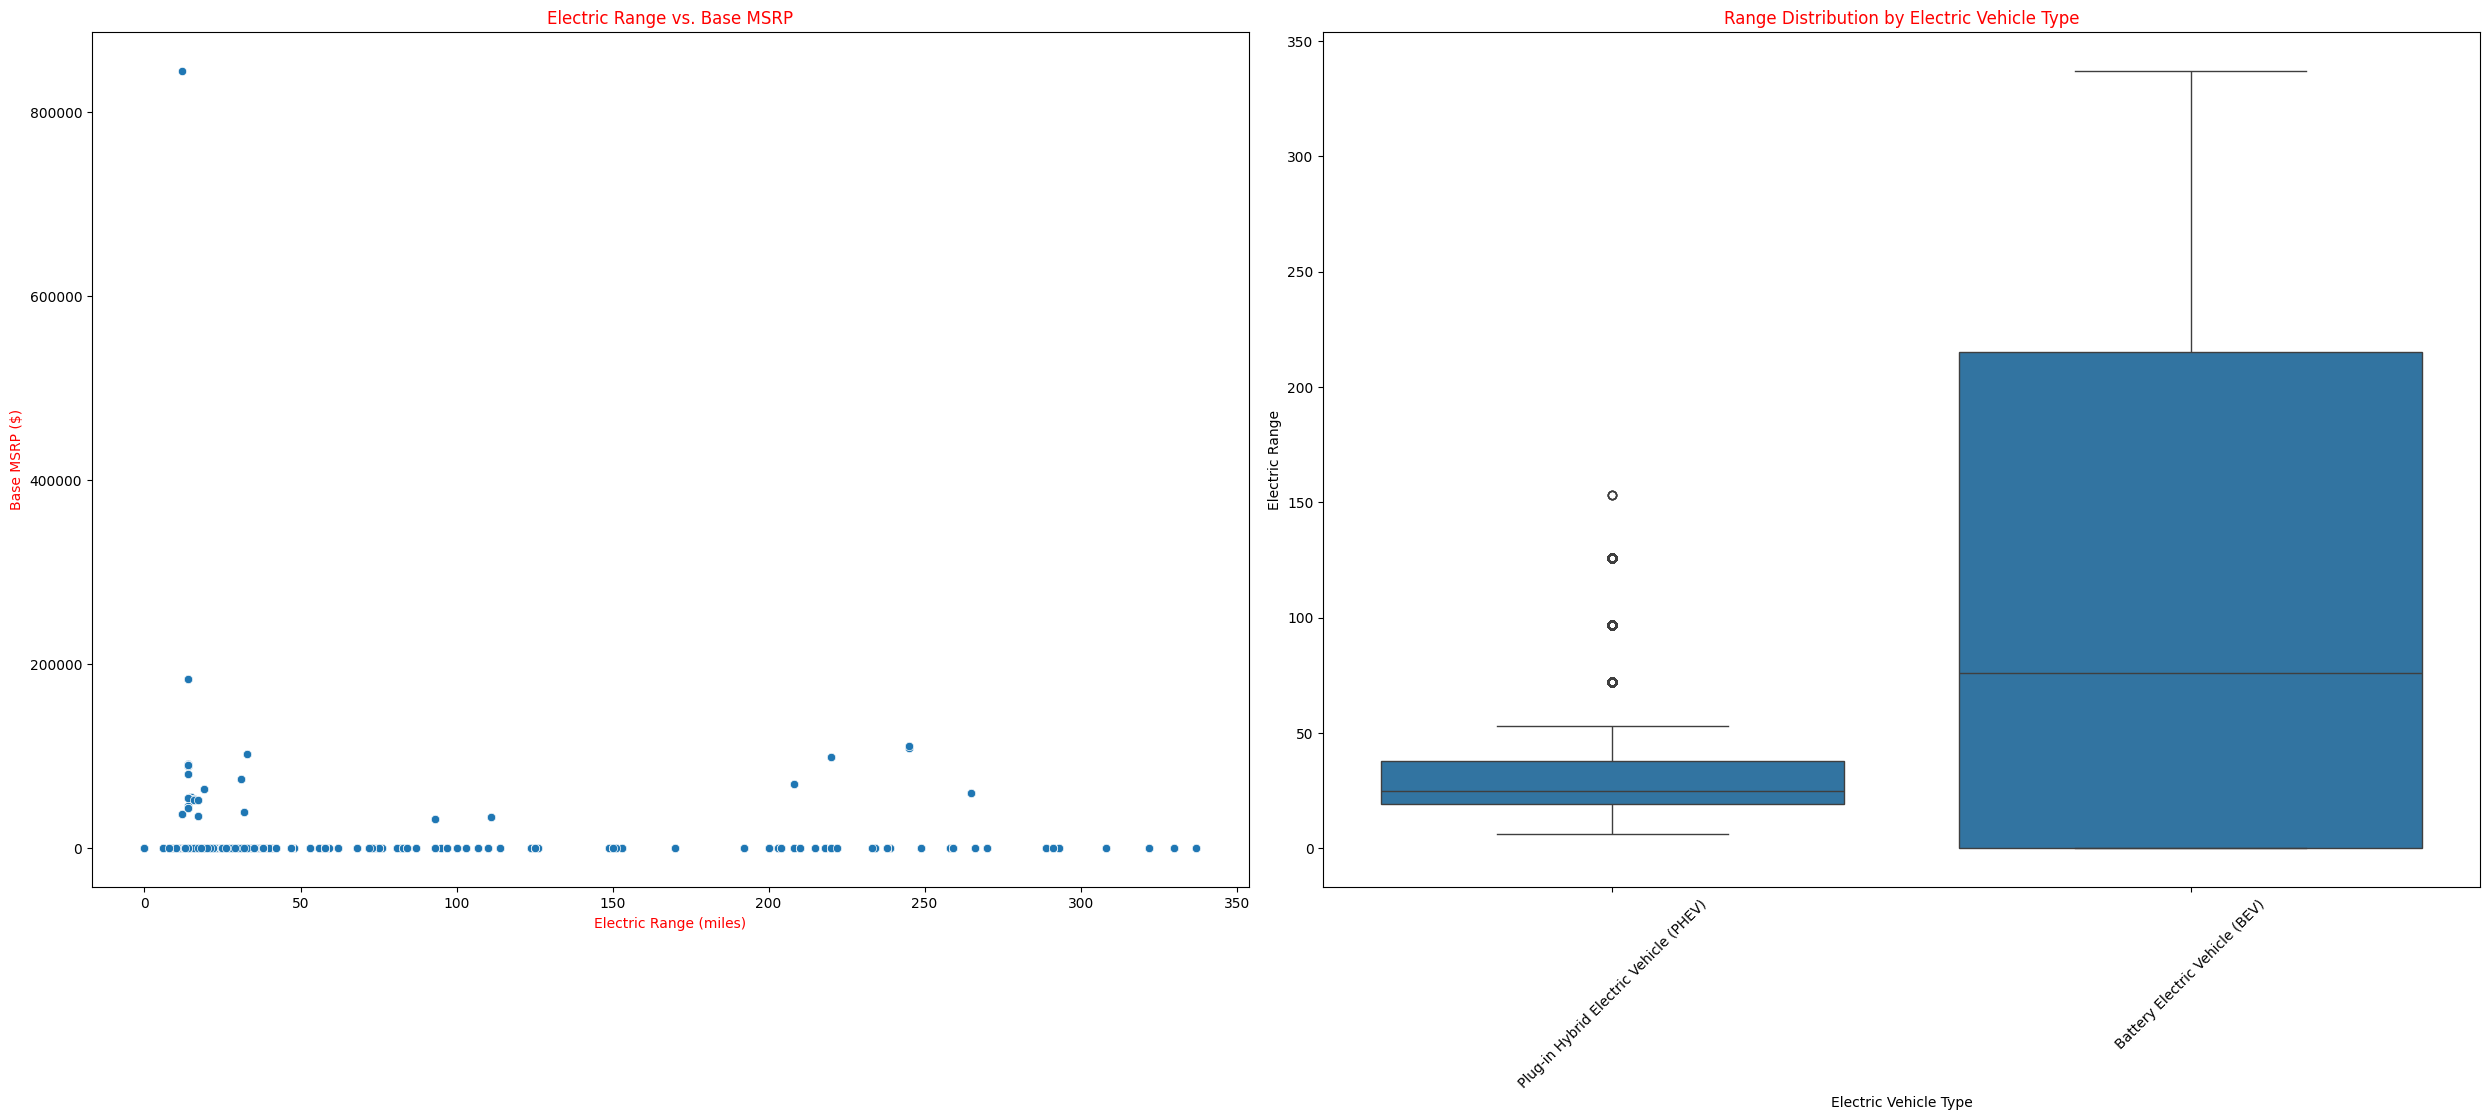

In [65]:
# Scatter plot: Electric Range vs. Base MSRP
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25, 20))  # Increased height from 15 to 20
gs = gridspec.GridSpec(2, 2)  # Create a grid for 2 rows and 2 columns

# Scatter plot: Electric Range vs. Base MSRP
ax1 = fig.add_subplot(gs[0, 0])  # 1st quadrant
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df, ax=ax1)
ax1.set_title('Electric Range vs. Base MSRP',color='red')
ax1.set_xlabel('Electric Range (miles)',color='red')
ax1.set_ylabel('Base MSRP ($)',color='red')

# Box plot: Range by Electric Vehicle Type
ax2 = fig.add_subplot(gs[0, 1])  # 2nd quadrant
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, ax=ax2)
ax2.set_title('Range Distribution by Electric Vehicle Type',color='red')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ***Task-2 : Creating a Choropleth using plotly.express to display the number of EV vehicles based on location.***

In [67]:
import plotly.express as px

# Group the data by State to get the count of electric vehicles
location_data = df.groupby('State')['Electric Vehicle Type'].count().reset_index()
location_data.columns = ['State', 'EV Count']

# Create a choropleth map with the aggregated state data
fig = px.choropleth(
    location_data,
    locations='State',  # Use the state column for locations
    locationmode='USA-states',  # Set the location mode to US states
    color='EV Count',
    hover_name='State',  # Hover text will show the state
    title='Number of Electric Vehicles by State',
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.show()

# ***Task 3: Creating a Racing Bar Plot to display the animation of EV Make and its count each year.***

In [68]:
pip install bar_chart_race


In [69]:
import pandas as pd
import bar_chart_race as bcr
import warnings

df['Model Year'] = pd.to_datetime(df['Model Year'], format='%Y')

# Group by 'Model Year' and 'Make' to get the count of each make for each year
grouped_data = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Pivoting the DataFrame
df_pivot_tab = grouped_data.pivot(index='Model Year', columns='Make', values='Count')

# Filling missing values using forward fill (pad)
df_pivot_tab = df_pivot_tab.ffill()

# Creating the Racing Bar Plot and saving the video
bcr.bar_chart_race(
    df=df_pivot_tab,
    filename='ev_make_racing_bar_plot.mp4',  # Specify the filename here
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    title='EV Make Racing Bar Plot by Year',
    label_bars=True,
    period_label={'x': 0.99, 'y': 0.25, 'ha': 'right', 'va': 'center'},
    period_fmt='%Y',
)

print("Video saved successfully!")


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



Video saved successfully!
